<a href="https://colab.research.google.com/github/imy0ung/AI_Basic_Study/blob/main/Pytorch/Pytorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **신경망 모델 구성하기**
신경망은 데이터에 대한 연산을 수행하는 layer/module로 구성되어 있습니다.

* torch.nn : 신경망을 구성하는데 필요한 모든 구성 요소를 제공합니다.

* torch.nn link : https://pytorch.org/docs/stable/nn.html

* PyTorch의 모든 모듈을 nn.Module의 하위 클래스 입니다.
* Module link : https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## **학습을 위한 장치 얻기**


In [12]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
) # 삼항 연산자를 이용
print(f"Using {device} device")

Using cuda device


## **클래스 정의하기**

1. 클래스 만들기
* init 함수안에 필요한 변수를 초기화 해준다. linearclassfier라면, flatten, layers
* forward(순전파) 함수에 layer을 짜준다.

2. 모델 사용하기
* X을 입력 데이터라고 하면, model(X)로 모델을 사용할 수 있다.
* 여기서 forward을 직접 호출하지 않은 이유는 python의 class는 \_\_call__가 있는데, 해당 메서드를 사용하면 X을 인풋으로 받는 메서드를 자동으로 실행해준다. Autograd나 backpropagtaion 등을 자동으로 실행해주기 때문에, forward을 직접 실행해주면 안된다.
* model(X) 호출 -> model.\_\_call__(X) 호출 -> nn.Module에서 X을 인풋으로 받는 모든 함수 실행(backpropagation, autograd, forward...) -> 결과 반환



In [16]:
class NeuralNetwork(nn.Module) : # nn.Module 상속받음
  def __init__(self) :
    super().__init__() # 부모 클래스의 생성자 불러서 초기화

    self.flatten = nn.Flatten() # linear classifier니까 평탄화 계층 (input layer)

    self.linear_relu_stack = nn.Sequential( # 모델의 계층 구조
        nn.Linear(28*28, 512), # Input layer : 784 -> 512
        nn.ReLU(), # Activation function
        nn.Linear(512,512), # Hidden Layer : 512 -> 512
        nn.ReLU(), # Activation function
        nn.Linear(512,10) # Output Layer : 512 -> 10
    )

  def forward(self,x) : # 신경망의 순전파를 정의하는 메서드, 데이터가 각 계층을 통해 어떻게 흐르는지 정의
    x = self.flatten(x) # 데이터를 평탄화하고
    logits = self.linear_relu_stack(x) # 앞에서 정의내렸던 모델 계층구조에 넣어주기
    return logits # 반환, softmax...

In [40]:
# 모델을 gpu 장치로 이동
model = NeuralNetwork().to(device)
print(model)

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_state_dict_pre_hoo

In [44]:
# 모델을 사용하기 위해 입력 데이터를 전달합니다.
# forward 연산을 진행하는데, model.forward()를 직접 호출하면 안된다.

X = torch.rand(1,28,28, device = device)
# __call__ 메서드를 통해 인스턴스를 함수처럼 호출 가능. forward, autograd, hooks 등 __call__ 메서드에 등록된 모든 훅을 다 호출
logits = model(X) # logit : 딥러닝에서 확률을 이해하는 데 일반적으로 사용되는 함수
print(logits.shape) # 10개의 확률로 나올거임.
pred_probab = nn.Softmax(dim=1)(logits) # logits scores -> softmax(지수함수) -> 0~1
print(pred_probab)
y_pred = pred_probab.argmax(1) # softmax 출력에서 가장 높은 확률 값을 반환
print(f"Predicted class: {y_pred}")

torch.Size([1, 10])
tensor([[0.0991, 0.1073, 0.1036, 0.1010, 0.0961, 0.0982, 0.0966, 0.0963, 0.1017,
         0.1000]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([1], device='cuda:0')


# **모델계층**

* nn.Flatten
* nn.Linear
* nn.ReLU
* nn.Sequential
* nn.Softmax

torch.Size([3, 28, 28])


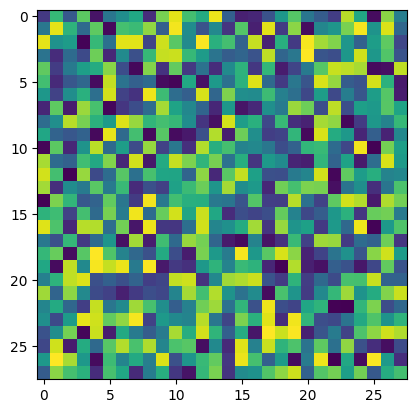

In [54]:
import matplotlib.pyplot as plt

input_image = torch.rand(3,28,28)
print(input_image.size())
plt.imshow(input_image[i])

In [60]:
# nn.Flatten

flatten = nn.Flatten() #함수가 아니라 layer로 설계되어있음.
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [61]:
# nn.Linear
# 선형 계층은 저장된 weight와 bias을 사용하여 입력에 선형 변환을 적용하는 모듈
layer1 = nn.Linear(in_features= 28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [64]:
# nn.ReLU : activation function
print(f"Before ReLU : {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU : {hidden1}")

Before ReLU : tensor([[0.0241, 0.2159, 0.0000, 0.0000, 0.0000, 0.5129, 0.0000, 0.1659, 0.0000,
         0.5425, 0.0000, 0.0000, 0.3110, 0.6865, 0.1800, 0.6179, 0.0000, 0.0000,
         0.2328, 0.0000],
        [0.0000, 0.1572, 0.0000, 0.2321, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5361, 0.0000, 0.0000, 0.2739, 0.1735, 0.0000, 0.6054, 0.0000, 0.0000,
         0.2025, 0.0000],
        [0.2473, 0.0000, 0.0000, 0.2343, 0.0602, 0.1492, 0.0000, 0.1200, 0.0000,
         0.3004, 0.0000, 0.0000, 0.4862, 0.6640, 0.0419, 0.2449, 0.2179, 0.0000,
         0.1212, 0.0000]], grad_fn=<ReluBackward0>)


After ReLU : tensor([[0.0241, 0.2159, 0.0000, 0.0000, 0.0000, 0.5129, 0.0000, 0.1659, 0.0000,
         0.5425, 0.0000, 0.0000, 0.3110, 0.6865, 0.1800, 0.6179, 0.0000, 0.0000,
         0.2328, 0.0000],
        [0.0000, 0.1572, 0.0000, 0.2321, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5361, 0.0000, 0.0000, 0.2739, 0.1735, 0.0000, 0.6054, 0.0000, 0.0000,
         0.2025, 0.0000],
     

In [65]:
# nn.Sequential : 순서를 갖는 모듈의 컨테이너, 빠르게 신경망을 만들 수 있음
seq_models = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_models(input_image)

In [66]:
# nn.Softmax : raw value logits을 0~1로 scaling해줌. dim은 값의 합이 1이 되는 차원
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

# **모델 매개변수**
* 신경망 내부의 많은 계층들은 매개변수화(parameterize)됩니다. 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어집니다. nn.Module을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적되며, 모델의 parameters() 및 named_parmeters() 메소드로 모든 매개변수에 접근할 수 있게 됩니다.

In [69]:
print(f"Model structure : {model}\n\n")

for name,param in model.named_parameters() :
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}\n")

Model structure : NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0163, -0.0284,  0.0082,  ...,  0.0212, -0.0200,  0.0028],
        [-0.0260,  0.0190,  0.0260,  ..., -0.0267,  0.0120, -0.0056]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0251, -0.0172], device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0032, -0.0441, -0.0209,  ..., -0.0159,  0.0388, -0.0192],
        [ 0.0242, -0.0132, -0.0412,  ...,  0.0011, -0.0040,  0.0152]],
       device='cuda:0', grad_fn=<Sli